In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


# Ajustes de colunas e dados

In [2]:
a_renomear = {
    "expected_hours": "horas_esperadas",
    "price": "preco",
    "unfinished": "nao_finalizado"
}
dados = dados.rename(columns = a_renomear)

trocar = {
    0: 1,
    1: 0
}

dados["finalizado"] = dados.nao_finalizado.map(trocar)

# Seaborn

Plotando um scatterplot com x para horas esperadas, y para o preço e hue é o tom da cor diferenciado para a classe.

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

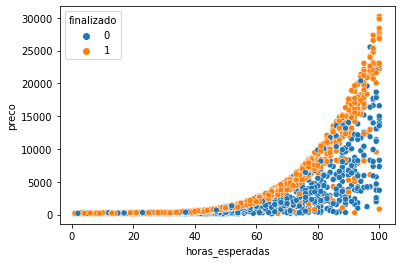

In [3]:
import seaborn as sns
sns.scatterplot(x="horas_esperadas", y="preco", hue = "finalizado", data = dados)

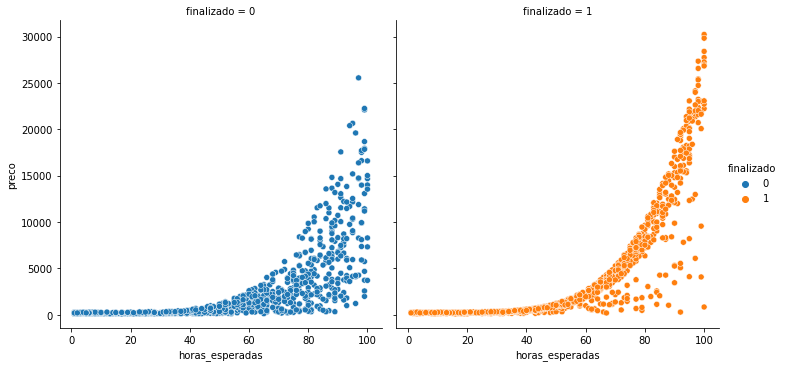

In [4]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados, hue="finalizado")

# Treinando o modelo

In [6]:
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

# Usando código do modelo 2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import StandardScaler

# Número para o random manter a consistência
SEED = 50
np.random.seed(SEED)

treino_original_x, teste_original_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)


scaler = StandardScaler()
scaler.fit(treino_original_x)
treino_x = scaler.transform(treino_original_x)
teste_x = scaler.transform(teste_original_x)

# Treino do modelo
modelo = SVC()
modelo.fit(treino_x, treino_y)

# Previsões com os dados de testes (o modelo não utilizou esses dados)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

print("Minha acurácia foi de %.2f%%" % (acuracia))

Minha acurácia foi de 69.26%


In [8]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

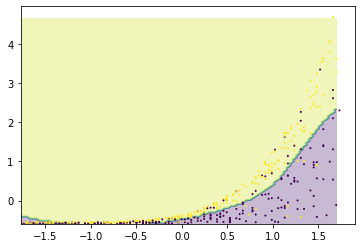

In [9]:
import matplotlib.pyplot as plt

# Borda de decisão (Decision Boundary)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c = teste_y, s = 1)